Saving support_tickets.csv to support_tickets.csv


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Tagging Tickets: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


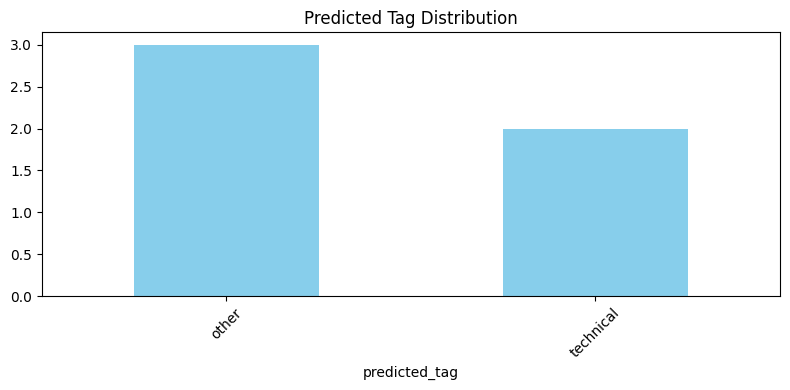

✅ Results saved to auto_tagged_tickets.csv


In [1]:
# ✅ Task 5: Auto-Tagging Support Tickets using flan-t5-base (No API Key Needed)

!pip install -q transformers pandas matplotlib

import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
from tqdm import tqdm

# 📂 Upload your CSV
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 📊 Load dataset
df = pd.read_csv(filename)
df = df.dropna()
df.reset_index(drop=True, inplace=True)

# 📌 Sample column name assumption: 'ticket'
assert 'ticket' in df.columns, "Expected column named 'ticket' in your CSV."

# 🤖 Load flan-t5-base
tagger = pipeline("text2text-generation", model="google/flan-t5-base", max_length=32)

# 🏷️ Auto-tag each support ticket
predicted_tags = []
for text in tqdm(df['ticket'], desc="Tagging Tickets"):
    prompt = f"Classify the following customer support ticket into a category like 'billing', 'technical', 'account', or 'other':\n{text}"
    tag = tagger(prompt)[0]['generated_text']
    predicted_tags.append(tag.lower().strip())

df['predicted_tag'] = predicted_tags

# 📈 Visualize tag distribution
plt.figure(figsize=(8, 4))
df['predicted_tag'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Predicted Tag Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 💾 Save result
df.to_csv("auto_tagged_tickets.csv", index=False)
print("✅ Results saved to auto_tagged_tickets.csv")


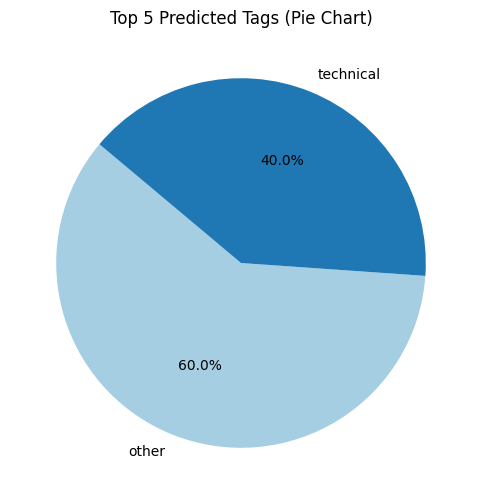

In [2]:
# Pie chart of top 5 tags
top_tags = df['predicted_tag'].value_counts().nlargest(5)
plt.figure(figsize=(6, 6))
plt.pie(top_tags, labels=top_tags.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 5 Predicted Tags (Pie Chart)")
plt.show()


<Figure size 800x500 with 0 Axes>

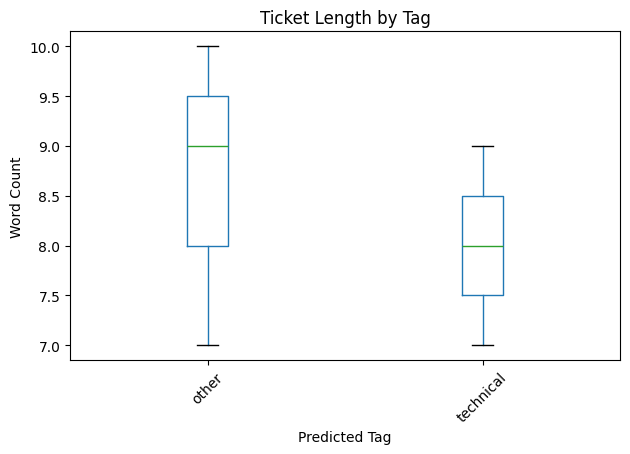

In [3]:
df['ticket_length'] = df['ticket'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
df.boxplot(column='ticket_length', by='predicted_tag', grid=False)
plt.title("Ticket Length by Tag")
plt.suptitle("")
plt.xlabel("Predicted Tag")
plt.ylabel("Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


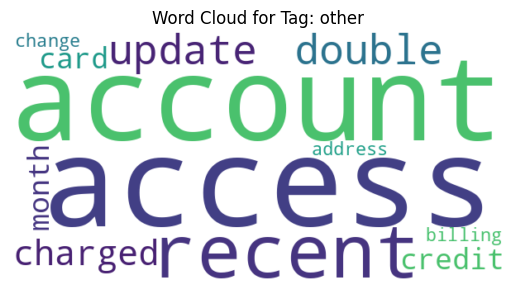

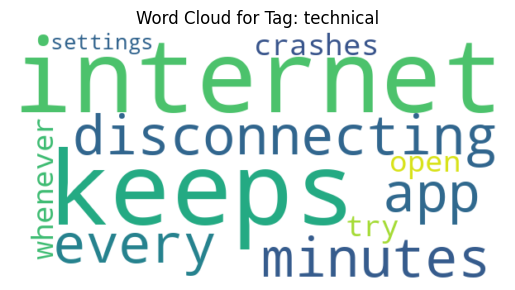

In [4]:
from wordcloud import WordCloud

for tag in df['predicted_tag'].unique():
    text = " ".join(df[df['predicted_tag'] == tag]['ticket'])
    wordcloud = WordCloud(width=600, height=300, background_color="white").generate(text)

    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Tag: {tag}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
